In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [13]:
df = pd.read_csv("Crop_recommendation.csv")

In [14]:
label = df.loc[:,'label']

In [15]:
le = LabelEncoder()
le.fit(label)
label = le.transform(label)

In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Data Preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

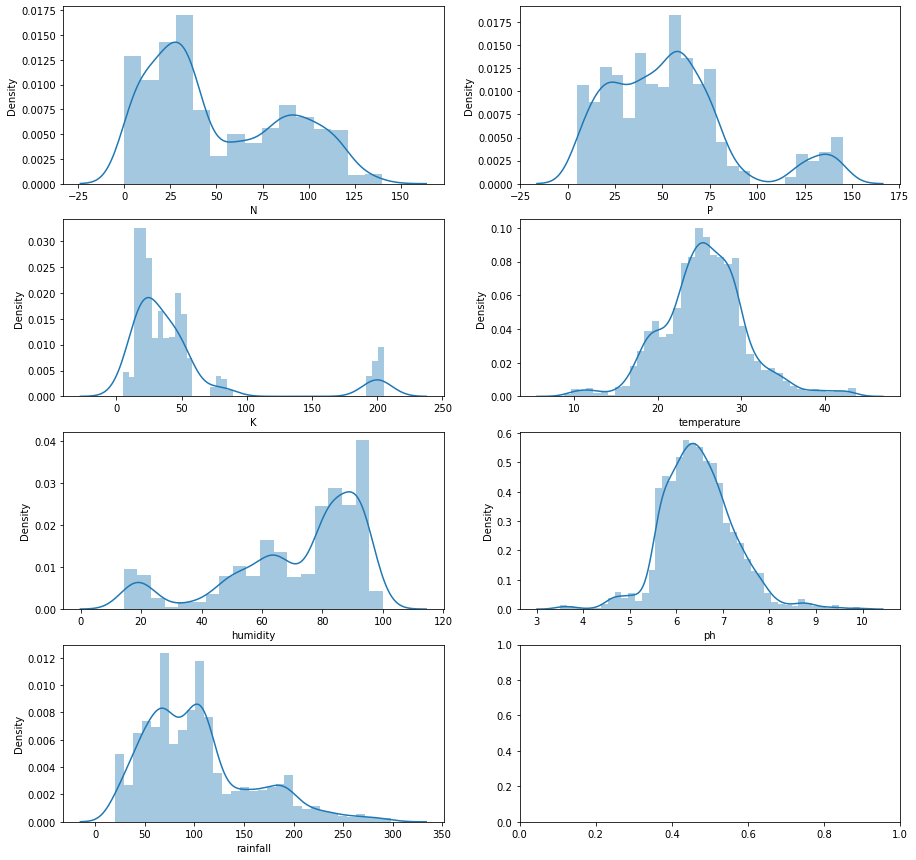

In [8]:
columns = df.loc[:,:'rainfall'].columns
fig,ax = plt.subplots(4,2,figsize=(15,15))
for i in range(len(df)):
    try:
        sb.distplot(df.iloc[:,i],ax=ax[i//2,i%2])
    except:
        pass
plt.show()            

In [16]:
df['K'] = np.log(df['K'])
df['humidity'] = np.log(df['humidity'])
df['rainfall'] = np.log(df['rainfall'])

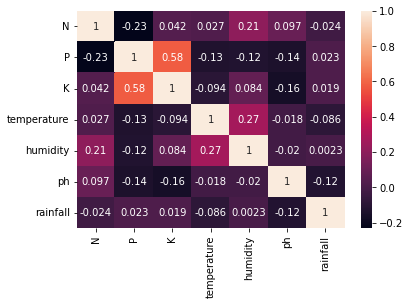

In [10]:
sb.heatmap(df.corr(),annot=True)

In [17]:
df['N'] = df['N']/max(df['N'])
df['P'] = df['P']/max(df['P'])
df['K'] = df['K']/max(df['K'])
df['temperature'] = df['temperature']/max(df['temperature'])
df['humidity'] = df['humidity']/max(df['humidity'])
df['ph'] = df['ph']/max(df['ph'])
df['rainfall'] = df['rainfall']/max(df['rainfall'])

In [18]:
data = df.loc[:,:'rainfall']

In [21]:
train_data,test_data,train_label,test_label = train_test_split(data,label,test_size=0.25)
regr = LinearRegression()
regr.fit(train_data,train_label)
print(regr.score(test_data,test_label))

0.28184804874721425


In [22]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(train_data,train_label)

SVC()

In [23]:
y_pred = svclassifier.predict(test_data)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_label,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        23
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        32
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        17
           8       0.66      1.00      0.79        23
           9       1.00      1.00      1.00        24
          10       0.96      0.93      0.95        28
          11       1.00      0.96      0.98        25
          12       1.00      1.00      1.00        26
          13       0.96      0.96      0.96        24
          14       0.96      0.96      0.96        27
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        21
          17       1.00    